<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/ARIMA_FINAL_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd


In [17]:
dir="/content/drive/MyDrive/Colab Notebooks/Aug31_Price_series (1).xlsx"
data=pd.read_excel(dir,index_col='time HHMMSS')
data

,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT
time HHMMSS,,,
09:15:01,19375.55,19358.529510,19359.125
09:15:10,19361.80,19338.013578,19340.300
09:15:51,19358.50,19341.881400,19342.100
09:16:31,19374.25,19355.645595,19355.450
09:17:11,19374.25,19355.705598,19356.450
...,...,...,...
15:26:59,19262.45,19253.006319,19251.850
15:27:39,19272.85,19253.304164,19252.500
15:28:19,19283.15,19254.661953,19253.200


<Axes: xlabel='time HHMMSS'>

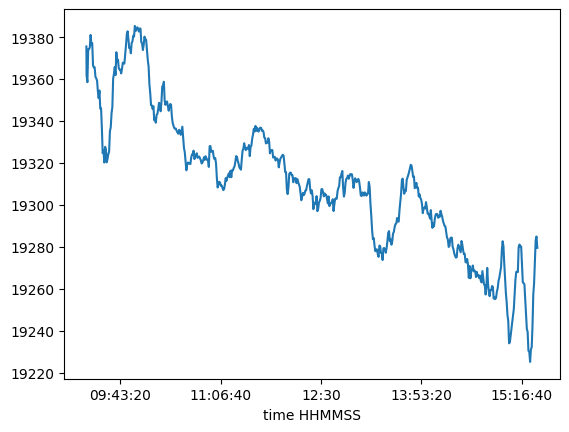

In [18]:
data['Spot price ltp NIFTY50'].plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

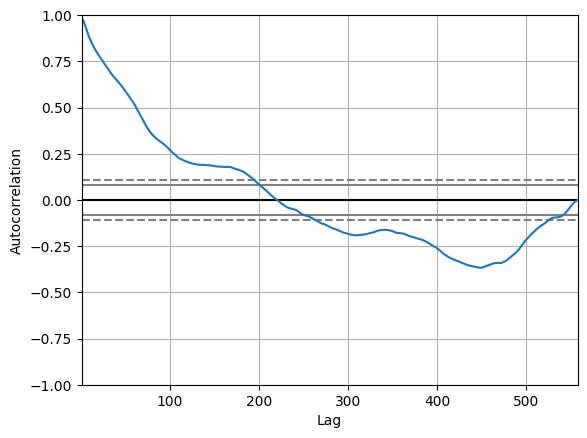

In [11]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)

In [19]:
data =data['Spot price ltp NIFTY50']
import numpy as np
from numpy import math
from sklearn.metrics import mean_squared_error


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:     Spot price ltp NIFTY50   No. Observations:                  558
Model:                   ARIMA(100, 1, 0)   Log Likelihood               -1433.630
Date:                    Wed, 22 Nov 2023   AIC                           3069.260
Time:                            07:29:39   BIC                           3505.839
Sample:                                 0   HQIC                          3239.773
                                    - 558                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1650      0.050      3.286      0.001       0.067       0.263
ar.L2          0.0776      0.050      1.557      0.120      -0.020       0.175
ar.L3          0.044

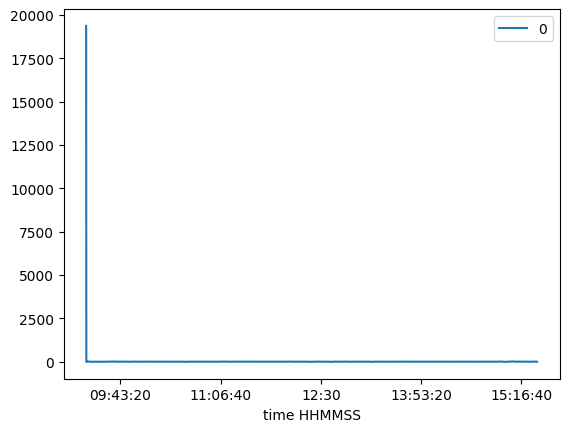

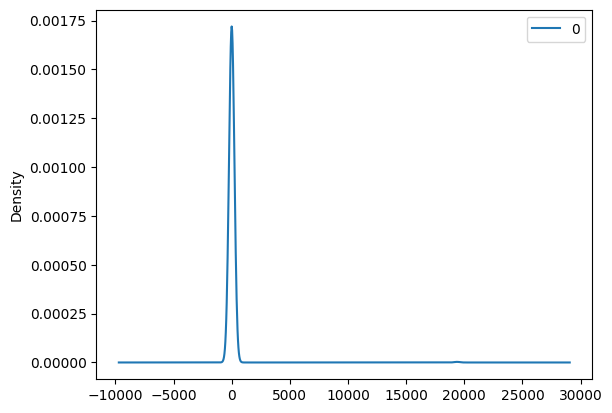

                  0
count    558.000000
mean      34.480911
std      820.249126
min      -13.822876
25%       -2.023227
50%       -0.278388
75%        1.604089
max    19375.550000


In [13]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
model = ARIMA(data, order=(100,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals =pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=19276.320060, expected=19276.900000
predicted=19278.667723, expected=19273.700000
predicted=19273.341421, expected=19279.300000
predicted=19280.088610, expected=19279.400000
predicted=19280.535298, expected=19278.750000
predicted=19280.344880, expected=19277.150000
predicted=19277.246996, expected=19279.550000
predicted=19277.942143, expected=19282.750000
predicted=19284.047814, expected=19286.700000
predicted=19287.247048, expected=19287.500000
predicted=19287.501047, expected=19282.650000
predicted=19283.842797, expected=19283.600000
predicted=19283.000217, expected=19281.000000
predicted=19279.892642, expected=19282.550000
predicted=19284.412273, expected=19286.350000
predicted=19286.299677, expected=19287.100000
predicted=19287.857896, expected=19289.500000
predicted=19289.626222, expected=19290.850000
predicted=19292.402778, expected=19291.150000
predicted=19293.082526, expected=19293.750000
predicted=19294.550004, expected=19292.150000
predicted=19292.285312, expected=1

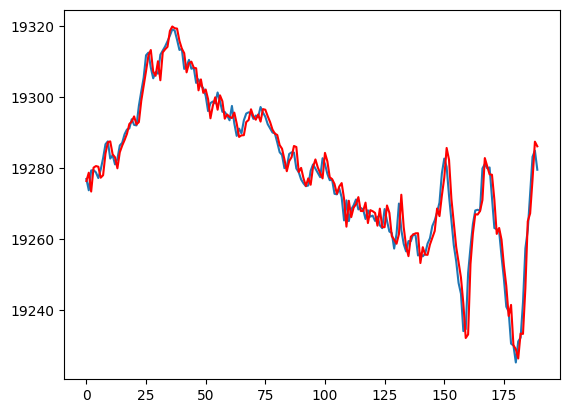

In [20]:
X = data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(50,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()